In [100]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression


data = pd.read_csv('new_data1.csv')

columns_to_exclude = ['date(dd/mm/yy)']
data = data.drop(columns = columns_to_exclude).dropna()

#train test split for hyderabad station

# X = data.drop(columns = ['HYB'])
# print(X)
# y = data['HYB']

X = data[['Temperature_1','Wind_Speed_1','weather_code_1','Distance_travelled_1']]
y = data['VSKP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

print(y_pred)

[1.50101748 0.95317665 1.44642421 1.56199297 1.3781551  1.72628944
 0.89664824 0.10228586 1.56653404 1.44257879 1.51608344 1.28974288
 1.88919572 1.43202496 1.92663838 1.71486907 0.35920049 2.13240675
 1.31763295 1.23586001 1.5399124  1.9715183  1.82120563 1.66878404
 1.33619973 1.89559505 1.93465073 2.04252634 1.87569307 1.57087535
 1.75578069 1.5864372  1.55348359 0.70342146 1.28279913 1.59095283
 1.52742343 1.61683749 1.89811711 1.29114662 1.13896499 1.28126008
 1.65987508 1.89714131 1.4850413  1.46057049 1.69632833 1.23372161
 1.67386001 1.44957747 1.82829943 2.0249614  1.92916043 1.80328129
 1.88060828 1.3530164  1.39921968 1.40055487 1.83869019 1.65843347
 1.51784658 0.96364892 1.43110349 1.34302522 1.56147168 2.23584594
 1.90963259 1.44757438 1.69536549 1.68476022 1.76076385 1.19093758
 1.52242784]


In [102]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

# MSE = mse(y_train,y_train_pred) 
# RMSE = np.sqrt(MSE)
# MAPE = mape(y_train, y_train_pred)
# R2 = r2_score(y_train, y_train_pred)

MSE = mse(y_test,y_pred) 
RMSE = np.sqrt(MSE)
MAPE = mape(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print('Test data metrics for VSKP:')
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('MAPE: ',MAPE)
print('R2 score: ',R2)

Test data metrics for VSKP:
MSE:  1.7257751486332502
RMSE:  1.3136876145542555
MAPE:  2497321313106535.5
R2 score:  -0.17125009769059996


In [104]:
MSE = mse(y_train,y_train_pred) 
RMSE = np.sqrt(MSE)
MAPE = mape(y_train, y_train_pred)
R2 = r2_score(y_train, y_train_pred)

print('Training data metrics for VSKP:')
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('MAPE: ',MAPE)
print('R2 score: ',R2)

Training data metrics for VSKP:
MSE:  12.235179772216117
RMSE:  3.497882183867278
MAPE:  2798020013213207.0
R2 score:  0.009763397974278831


In [106]:
from sklearn.impute import SimpleImputer

#train test split for hyderabad station



# Convert weather_codes to categorical
data['weather_code_1'] = data['weather_code_1'].astype('category')
data['weather_code_2'] = data['weather_code_2'].astype('category')
data['weather_code_3'] = data['weather_code_3'].astype('category')
data['weather_code_4'] = data['weather_code_4'].astype('category')
data['weather_code_5'] = data['weather_code_5'].astype('category')
data['weather_code_6'] = data['weather_code_6'].astype('category')
data['weather_code_7'] = data['weather_code_7'].astype('category')
data['weather_code_8'] = data['weather_code_8'].astype('category')
data['weather_code_9'] = data['weather_code_9'].astype('category')
data['weather_code_10'] = data['weather_code_10'].astype('category')
imputer = SimpleImputer(missing_values = np.nan ,strategy='median')
data[['BZA']] = imputer.fit_transform(data[['BZA']])

X = data.drop(columns = ['HYB'])
# print(X)
y = data['HYB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

MSE = mse(y_test,y_pred) 
RMSE = np.sqrt(MSE)
MAPE = mape(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print('Test data metrics for all stations:')
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('MAPE: ',MAPE)
print('R2 score: ',R2)

Test data metrics for all stations:
MSE:  955.2072563373606
RMSE:  30.906427427597656
MAPE:  6056106666336608.0
R2 score:  0.19197055373876648


In [108]:
MSE = mse(y_train,y_train_pred) 
RMSE = np.sqrt(MSE)
MAPE = mape(y_train, y_train_pred)
R2 = r2_score(y_train, y_train_pred)

print('Training data metrics for all stations:')
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('MAPE: ',MAPE)
print('R2 score: ',R2)

Training data metrics for all stations:
MSE:  648.163928239924
RMSE:  25.459063773829627
MAPE:  2919754085531621.5
R2 score:  0.6669330703065037


In [118]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init = 'auto').fit(X_train)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0]
[[  1.93288591  27.71342282   2.04630872  10.63758389   0.
   10.73825503  27.18389262   2.75100671  13.76510067  58.
   15.93288591  28.33892617   1.9114094   11.75167785 114.
   14.44295302  28.36577181   2.60872483  16.00671141 151.
   22.94630872  27.72550336   2.53087248   9.81879195 224.
   12.47651007  27.90939597   2.27114094  14.97315436 351.
   36.6442953   27.50469799   3.32885906   7.67785235 559

In [120]:
from sklearn.metrics import silhouette_score as ss
from sklearn.metrics import calinski_harabasz_score as chs
from sklearn.metrics import davies_bouldin_score as dbs

shil = ss(X_train, kmeans.labels_)
cali = chs(X_train, kmeans.labels_)
davi = dbs(X_train, kmeans.labels_)

print("Metris:")
print('silhouette_score: ',shil)
print('calinski_harabasz_score: ',cali)
print('davies_bouldin_score: ',davi)

Metris:
silhouette_score:  0.3601902084603644
calinski_harabasz_score:  169.99545661552852
davies_bouldin_score:  1.1626927075799127


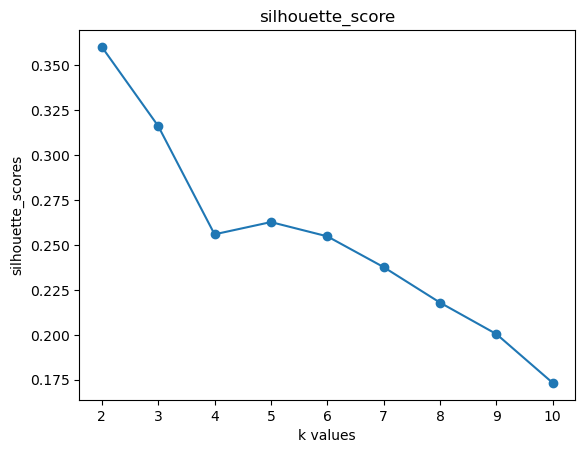

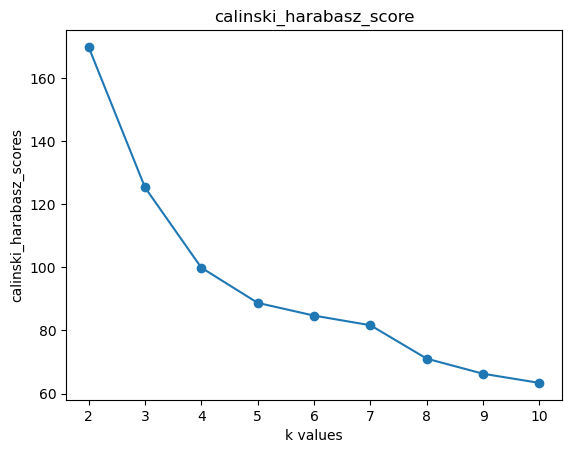

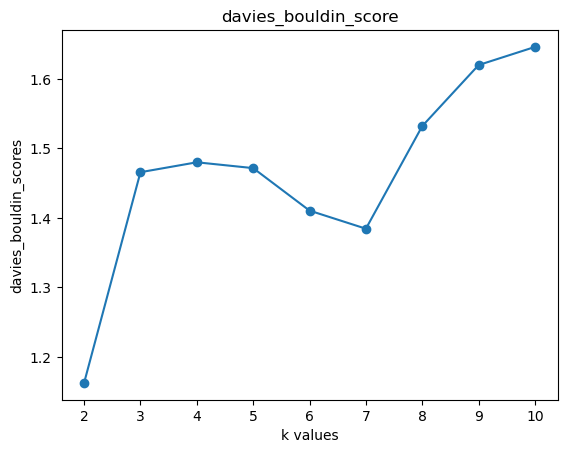

In [152]:
import matplotlib.pyplot as plt
shil = []
cali = []
davi = []
k_val = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 'auto').fit(X_train)
    sm = ss(X_train, kmeans.labels_)
    shil.append(sm)
    cali.append(chs(X_train, kmeans.labels_))
    davi.append(dbs(X_train, kmeans.labels_))
    k_val.append(k)
scores = pd.DataFrame({'silhouette_score': shil, 'calinski_harabasz_score': cali, 'davies_bouldin_score': davi})

#silhouette_score
plt.plot(k_val, shil, marker = 'o')
plt.title("silhouette_score")
plt.xlabel("k values")
plt.ylabel('silhouette_scores')
plt.show()

#calinski_harabasz_score
plt.plot(k_val, cali, marker = 'o')
plt.title("calinski_harabasz_score")
plt.xlabel("k values")
plt.ylabel('calinski_harabasz_scores')
plt.show()

#davies_bouldin_score
plt.plot(k_val, davi, marker = 'o')
plt.title("davies_bouldin_score")
plt.xlabel("k values")
plt.ylabel('davies_bouldin_scores')
plt.show()

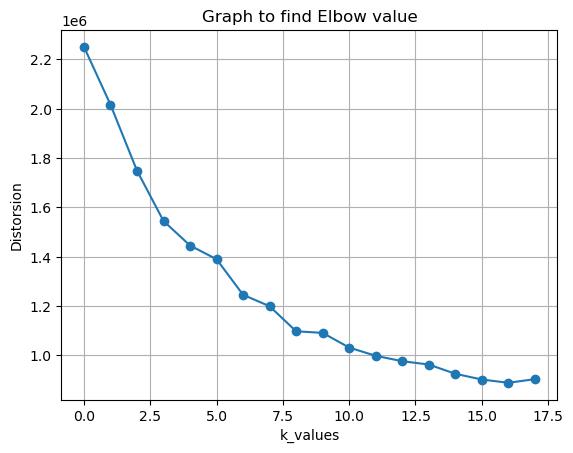

In [154]:
distorsions = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k).fit(X_train)
    distorsions.append(kmeans.inertia_)

plt.plot(distorsions, marker = 'o')
plt.title('Graph to find Elbow value')
plt.xlabel('k_values')
plt.ylabel('Distorsion')
plt.grid(True)
plt.show()